In [2]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [3]:
df_diabetes_risk = pd.read_csv('../data/diabetes_risk_preprocessed.csv')
df_diabetes_risk

Age  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0     40         0           1                   0         1           0   
1     58         0           0                   0         1           0   
2     41         1           0                   0         1           1   
3     45         0           0                   1         1           1   
4     60         1           1                   1         1           1   
..   ...       ...         ...                 ...       ...         ...   
515   39         1           1                   1         0           1   
516   48         1           1                   1         1           1   
517   58         1           1                   1         1           1   
518   32         0           0                   0         1           0   
519   42         0           0                   0         0           0   

     Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0                 0                0        1             0                1   
1                 0                1        0             0                0   
2                 0                0        1             0                1   
3                 1                0        1             0                1   
4                 0                1        1             1                1   
..              ...              ...      ...           ...              ...   
515               0                0        1             0                1   
516               0                0        1             1                1   
517               0                1        0             0                0   
518               0                1        1             0                1   
519               0                0        0             0                0   

     partial paresis  muscle stiffness  Alopecia  Obesity  class  \
0                  0                 1         1        1      1   
1                  1                 0         1        0      1   
2                  0                 1         1        0      1   
3                  0                 0         0        0      1   
4                  1                 1         1        1      1   
..               ...               ...       ...      ...    ...   
515                1                 0         0        0      1   
516                1                 0         0        0      1   
517                1                 1         0        1      1   
518                0                 0         1        0      0   
519                0                 0         0        0      0   

     Gender_Female  Gender_Male  
0                0            1  
1                0            1  
2                0            1  
3                0            1  
4                0            1  
..             ...          ...  
515              1            0  
516              1            0  
517              1            0  
518              1            0  
519              0            1  

[520 rows x 18 columns]

In [4]:
sales_df_diabetes_risk = df_diabetes_risk[['visual blurring'] + ['Polyuria'] + ['Polydipsia'] + ['Polyphagia']]

<AxesSubplot:xlabel='class'>

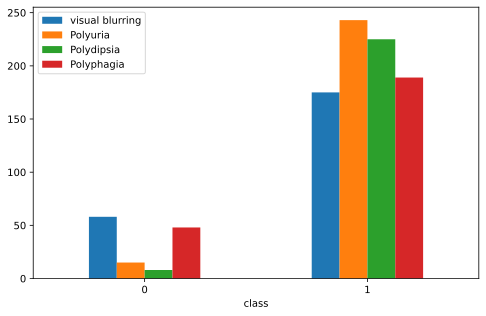

In [5]:
sales_df_diabetes_risk.groupby(df_diabetes_risk['class']).sum().plot(kind='bar', rot=0)

**Построенная гистограмма показывает, что у людей болеющих диабетом чаще всего встречается такие симптомы, как Полиурия (увеличенное образование мочи), Полидипсия (сильная жажда), Полифагия (повышенный аппетит) и потеря зрения. С помощью этого вывода можно понять, что наличие данных заболевний у человека может быть предупреждением о развитии диабета.**

**Посмотрим на распределение возраста опрошенных. Можно заметить, что встречаются люди различных возростов, но большенство опрошенных находятся в возрасте от 40 до 60 лет.**

c:\users\nikolsun\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

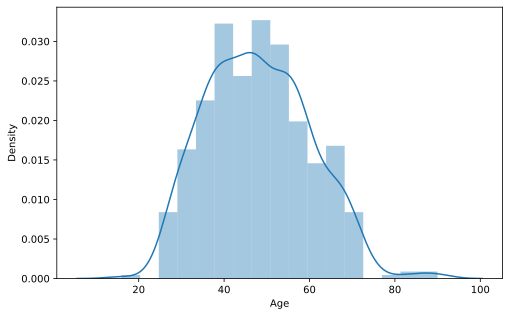

In [6]:
sns.distplot(df_diabetes_risk['Age'])

In [7]:
df_concrete_strength = pd.read_csv('../data/concrete_strength_preprocessed.csv')
df_concrete_strength

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
0      540.0               0.0     0.0  162.0               2.5   
1      540.0               0.0     0.0  162.0               2.5   
2      332.5             142.5     0.0  228.0               0.0   
3      332.5             142.5     0.0  228.0               0.0   
4      198.6             132.4     0.0  192.0               0.0   
...      ...               ...     ...    ...               ...   
1025   276.4             116.0    90.3  179.6               8.9   
1026   322.2               0.0   115.6  196.0              10.4   
1027   148.5             139.4   108.6  192.7               6.1   
1028   159.1             186.7     0.0  175.6              11.3   
1029   260.9             100.5    78.3  200.6               8.6   

      CoarseAggregate  FineAggregate  Age  ConcreteCompressiveStrength  
0              1040.0          676.0   28                    79.986111  
1              1055.0          676.0   28                    61.887366  
2               932.0          594.0  270                    40.269535  
3               932.0          594.0  365                    41.052780  
4               978.4          825.5  360                    44.296075  
...               ...            ...  ...                          ...  
1025            870.1          768.3   28                    44.284354  
1026            817.9          813.4   28                    31.178794  
1027            892.4          780.0   28                    23.696601  
1028            989.6          788.9   28                    32.768036  
1029            864.5          761.5   28                    32.401235  

[1030 rows x 9 columns]

<AxesSubplot:xlabel='Water', ylabel='ConcreteCompressiveStrength'>

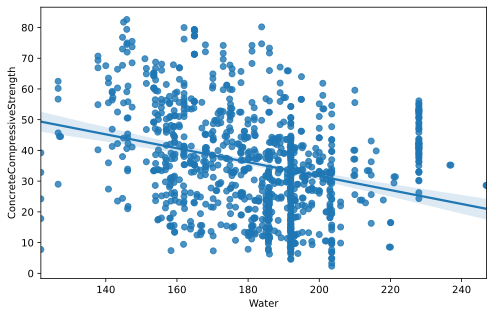

In [8]:
sns.regplot(x='Water', y='ConcreteCompressiveStrength', data=df_concrete_strength)

**На построенном графике зависимости прочности сжатия бетона от воды, видно, что чем меньше воды добавлять в раствор, тем больше будет плотность сжатия. Так же данный график показывает результирующую линию регрессии и доверительный интервал.**

**Построим такие же графики для отображения зависимости прочности сжатия бетона от таких признаков, как кол-во цемента, доменного шлака, грубого заполнителя, воды и мелкого заполнителя.**

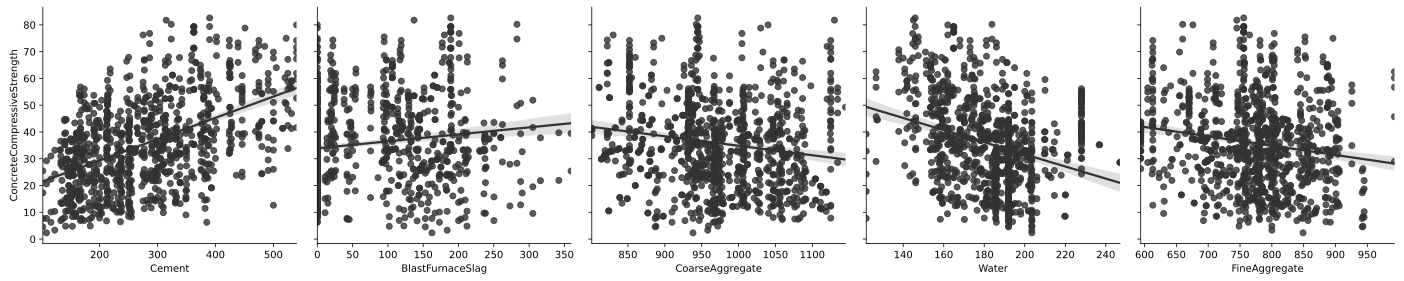

In [9]:
g = sns.PairGrid(df_concrete_strength, y_vars=["ConcreteCompressiveStrength"], 
                 x_vars=["Cement", "BlastFurnaceSlag", "CoarseAggregate", "Water", "FineAggregate"], height=4)
g.map(sns.regplot, color=".2")

**Из построенных зависимостей можно определеть, что прочность на сжатие бетона увеличивается если добавить больше цемента и доменного шлака, причём при добвлении цемента прочность увеличивается быстрее. Уменьшается при добавлении большого количества воды, грубого заполнителя и мелкого заполнителя, причём если добавлять много воды плотность уменьшается резко.**